In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from cassandrautils import *
from fastf1.plotting import COMPOUND_COLORS

In [4]:
weather = getWeatherDF()

weather['forecast_timestamp'] = pd.to_datetime(weather['forecastdate'], format="%d-%m-%Y %H:%M")
print("Weather from ", weather['forecast_timestamp'].min(), " To ", weather['forecast_timestamp'].max())

Weather from  2024-11-27 04:13:17  To  2024-11-27 04:28:25


In [5]:
weather

,location,forecastdate,description,feels_like,humidity,pressure,sunrise,sunset,temp,temp_max,temp_min,wind,forecast_timestamp
0,Melbourne,2024-11-27 04:13:48,clear sky,289.799988,91.0,1019.0,1732622005,1732660008,289.709991,291.489990,288.690002,0.00,2024-11-27 04:13:48
1,Melbourne,2024-11-27 04:14:48,clear sky,289.799988,91.0,1019.0,1732622005,1732660008,289.709991,291.489990,288.690002,0.00,2024-11-27 04:14:48
2,Melbourne,2024-11-27 04:15:48,clear sky,289.799988,91.0,1019.0,1732622005,1732660008,289.709991,291.489990,288.690002,0.00,2024-11-27 04:15:48
3,Melbourne,2024-11-27 04:16:49,clear sky,289.799988,91.0,1019.0,1732622005,1732660008,289.709991,291.489990,288.690002,0.00,2024-11-27 04:16:49
4,Melbourne,2024-11-27 04:17:49,clear sky,289.799988,91.0,1019.0,1732622005,1732660008,289.709991,291.489990,288.690002,0.00,2024-11-27 04:17:49
5,Melbourne,2024-11-27 04:18:50,clear sky,289.709991,91.0,1019.0,1732622005,1732660008,289.630005,291.489990,288.130005,0.00,2024-11-27 04:18:50
6,Melbourne,2024-11-27 04:19:51,clear sky,289.799988,91.0,1019.0,1732622005,1732660008,289.709991,291.489990,288.690002,0.00,2024-11-27 04:19:51
7,Melbourne,2024-11-27 04:20:51,clear sky,289.799988,91.0,1019.0,1732622005,1732660008,289.709991,291.489990,288.690002,0.00,2024-11-27 04:20:51
8,Melbourne,2024-11-27 04:21:51,clear sky,289.799988,91.0,1019.0,1732622005,1732660008,289.709991,291.489990,288.690002,0.00,2024-11-27 04:21:51
9,Melbourne,2024-11-27 04:22:52,clear sky,289.709991,91.0,1019.0,1732622005,1732660008,289.630005,291.489990,288.130005,0.00,2024-11-27 04:22:52


In [6]:
faker = getFakerDF()

faker

fakerdata


,name,building_number,city,company,company_email,country,credit_card_expire,credit_card_number,credit_card_provider,credit_card_security_code,job,passport_number,postcode,ssn,street_name,year
0,Jeffrey Daniel,233,Port Margaret,"Carter, Pena and Martinez",robert52@summers-hernandez.org,Bermuda,12/28,6011764929688708,VISA 16 digit,030,Agricultural consultant,Y94067967,80255,463-09-7982,Moore Brook,1998
1,Stephanie Rodriguez,88949,Lake Jeffrey,Vasquez Inc,shelbyrice@johnston.org,Central African Republic,12/25,5375142538286069,JCB 16 digit,131,Sales executive,O07460956,46018,456-45-7077,Matthew Corner,1989
2,Mrs. Rebecca Murphy,247,Lake Theresaberg,"Carter, Castro and Turner",meyerheather@barber.com,Yemen,11/29,30580377329771,Diners Club / Carte Blanche,409,Industrial buyer,N34602884,71255,023-11-3556,John Green,1991
3,Isaiah Allen,47465,North William,Nelson PLC,soliver@stanley-lucas.org,Slovenia,09/25,4575137986190831878,Mastercard,784,Media buyer,O26129307,67842,607-81-5532,Baker Isle,2004
4,Russell Parker,93415,West Renee,"Allen, Arnold and Madden",rodney24@thomas.biz,Cayman Islands,12/26,2230605740247022,VISA 19 digit,402,Quarry manager,225095176,66053,278-73-1073,Jennifer Keys,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,Russell Walton,729,Veronicaton,Nguyen-Miller,jennifer07@wade-stanley.com,United States of America,03/33,370081773782901,VISA 19 digit,131,Hydrogeologist,393064882,60376,256-02-3778,Lambert Shores,1975
184,Michelle Hernandez,68675,South Antoniobury,Bailey-Ray,cmckinney@mcdowell.com,Palestinian Territory,01/26,4050856500005,VISA 16 digit,518,Arts development officer,A72598624,78046,492-47-4653,Cruz Plaza,2004
185,Brian Phillips,37282,South Sara,Smith-Thompson,bradley45@williams.com,Uruguay,03/31,6011966003258742,VISA 16 digit,586,Mining engineer,791399429,69048,196-55-7409,Barbara Center,2006
186,Miranda Smith,04750,South Aliciamouth,Green-Frost,oscargarcia@davis-schultz.net,Kazakhstan,10/29,4884460506465,Discover,860,"Therapist, music",W42874160,34775,859-18-6119,Javier Curve,2004


Text(0.5, 1.0, 'Total weather data recorded')

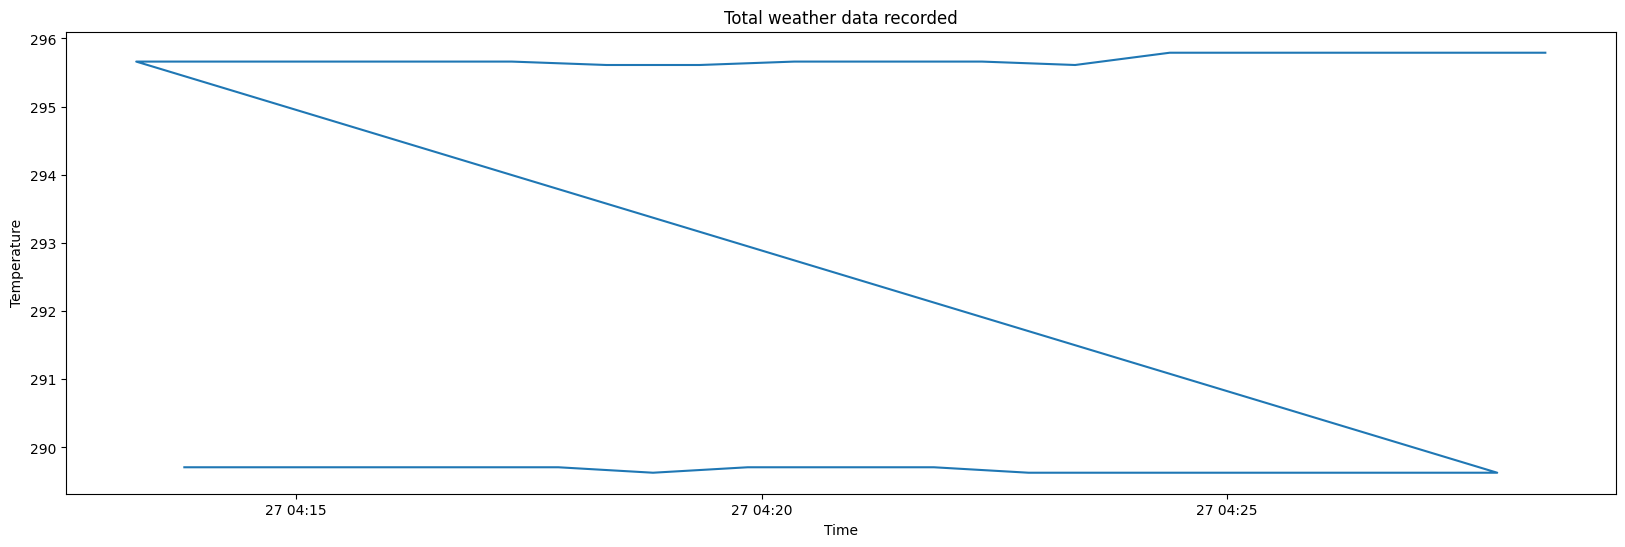

In [7]:
plt.figure(figsize=(20,6))
plt.plot(weather['forecast_timestamp'], weather['temp'])
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.title("Total weather data recorded")

Text(0, 0.5, 'Feels like Temperature in (Kelvin)')

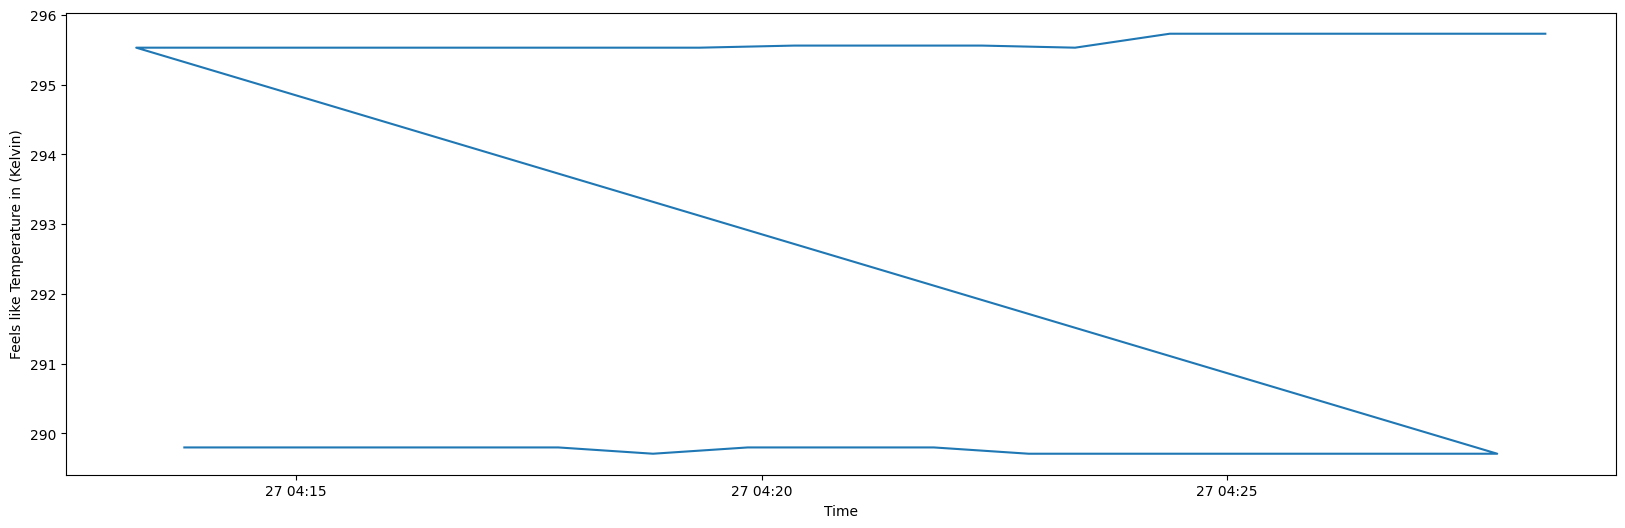

In [8]:
plt.figure(figsize=(20,6))
plt.plot(weather['forecast_timestamp'], weather['feels_like'])
plt.xlabel("Time")
plt.ylabel("Feels like Temperature in (Kelvin)")

Text(0.5, 1.0, "Plotting 'Feels like' temperature")

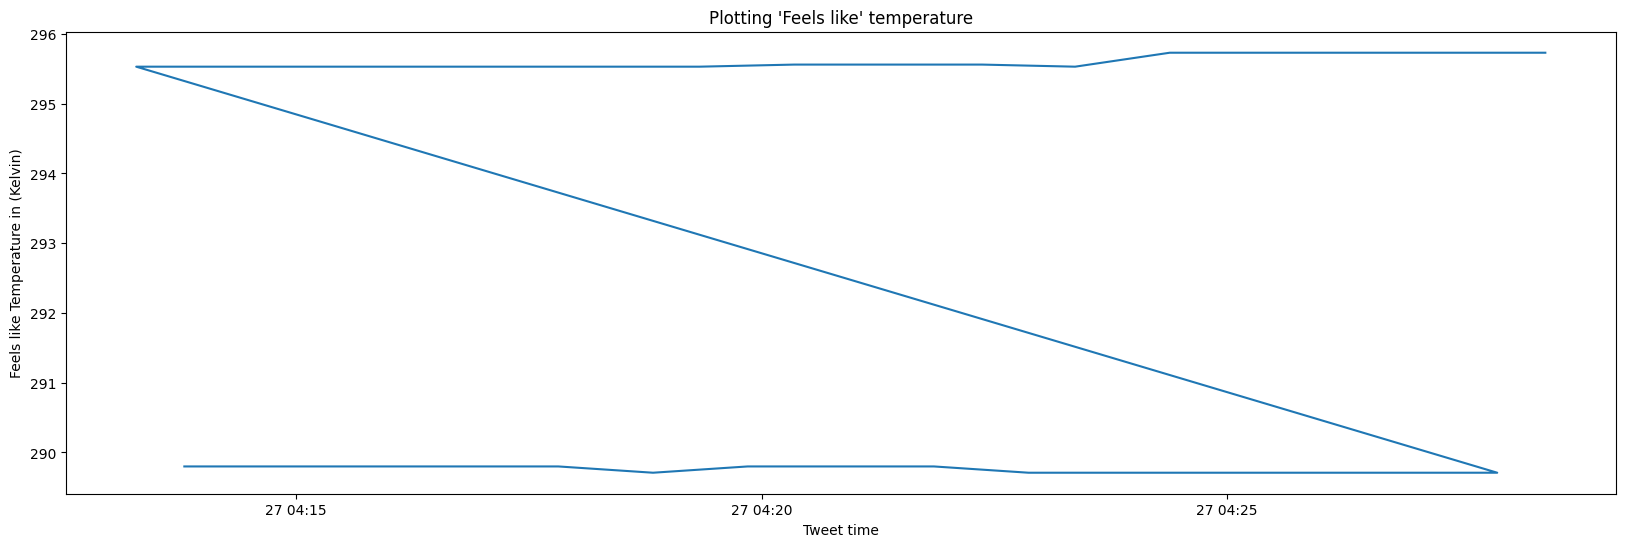

In [9]:
plt.figure(figsize=(20,6))
plt.plot(weather['forecast_timestamp'], weather['feels_like'])
plt.xlabel("Tweet time")
plt.ylabel("Feels like Temperature in (Kelvin)")
plt.title("Plotting 'Feels like' temperature")

In [10]:
fastf1 = getFastF1DF()

fastf1

lapsummary


,session_name,driver,lap_number,date,driver_name,fresh_tyre,lap_time,pit_stop,position,sector1_time,sector2_time,sector3_time,stint,team,track,tyre_compound,tyre_life
0,Race,LEC,1,2023-07-02T13:00:00,Charles Leclerc,True,01:19.336,False,2,None,32.024,26.554,1,Ferrari,Austrian Grand Prix,MEDIUM,1
1,Race,LEC,2,2023-07-02T13:00:00,Charles Leclerc,True,01:55.468,True,2,31.837,45.870,37.761,1,Ferrari,Austrian Grand Prix,MEDIUM,2
2,Race,LEC,3,2023-07-02T13:00:00,Charles Leclerc,False,02:03.609,False,2,37.263,46.268,40.078,2,Ferrari,Austrian Grand Prix,MEDIUM,3
3,Race,LEC,4,2023-07-02T13:00:00,Charles Leclerc,False,01:10.392,False,2,17.612,31.290,21.490,2,Ferrari,Austrian Grand Prix,MEDIUM,4
4,Race,LEC,5,2023-07-02T13:00:00,Charles Leclerc,False,01:10.416,False,2,17.613,31.406,21.397,2,Ferrari,Austrian Grand Prix,MEDIUM,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,Race,VER,67,2023-07-02T13:00:00,Max Verstappen,True,01:08.854,False,1,17.289,30.872,20.693,4,Red Bull Racing,Austrian Grand Prix,MEDIUM,18
138,Race,VER,68,2023-07-02T13:00:00,Max Verstappen,True,01:09.216,False,1,17.653,30.863,20.700,4,Red Bull Racing,Austrian Grand Prix,MEDIUM,19
139,Race,VER,69,2023-07-02T13:00:00,Max Verstappen,True,01:12.228,True,1,17.294,30.769,24.165,4,Red Bull Racing,Austrian Grand Prix,MEDIUM,20
140,Race,VER,70,2023-07-02T13:00:00,Max Verstappen,False,01:27.830,False,1,34.138,31.932,21.760,5,Red Bull Racing,Austrian Grand Prix,SOFT,4


In [11]:
def lap_time_to_float(lap_time_str):
    """Convert a lap time string (MM:SS.mmm) to float (seconds)."""
    if not lap_time_str or pd.isna(lap_time_str):
        return None  # Handle missing values gracefully
    minutes, seconds = map(float, lap_time_str.split(":"))
    return minutes * 60 + seconds

In [12]:
fastf1['lap_time_seconds'] = fastf1['lap_time'].apply(lap_time_to_float)

In [14]:
def plot_lap_times(df, driver1, driver2):
    # Filter the data for the two drivers
    driver1_data = df[df['driver'] == driver1]
    driver2_data = df[df['driver'] == driver2]

    # Plot the lap times
    plt.figure(figsize=(12, 6))
    plt.plot(driver1_data['lap_number'], driver1_data['lap_time_seconds'], label=driver1, marker='o')
    plt.plot(driver2_data['lap_number'], driver2_data['lap_time_seconds'], label=driver2, marker='o')

    # Customize the plot
    plt.title("Lap Time across Race \n" + " Formula 1 Rolex Großer Preis von Österreich 2023")
    plt.xlabel("Lap Number")
    plt.ylabel("Lap Time (seconds)")
    plt.legend(title="Driver")
    plt.grid(True)

    # Display the plot
    plt.show()

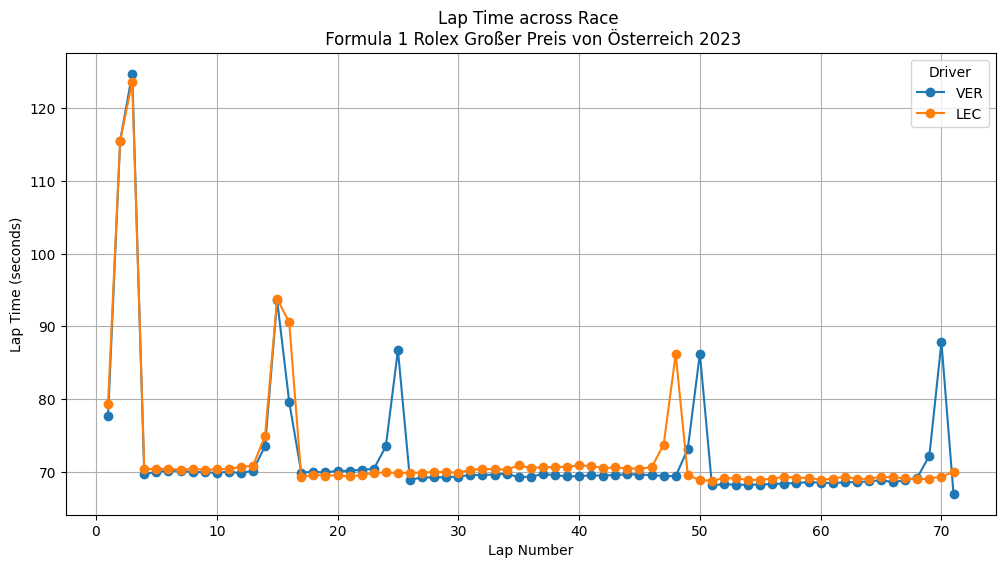

In [15]:
plot_lap_times(fastf1, "VER", "LEC")

# Evidence why the lap time went over two minutes during laps 2 and 3:

![title](img/debris.png)

![title](img/safety_car.png)

In [16]:
def plot_tyre_strategy(fastf1_df, race_name):
    # Setup plot
    fig, ax = plt.subplots(figsize=(20, 10))
    plt.title(f'Tyre Strategy \n{race_name}', fontsize=30)
    plt.xlabel('Laps', fontsize=30)
    plt.ylabel('Drivers', fontsize=30)
    plt.grid(False)

    # Ensure compound colors are used for plotting
    compound_color = COMPOUND_COLORS

    # Group data for stints
    tyre_stint = (
        fastf1_df.groupby(['driver', 'stint', 'tyre_compound', 'fresh_tyre'])
        .agg({'lap_number': 'min', 'tyre_life': 'count'})
        .reset_index()
    )

    # Plot for each driver
    drivers = fastf1_df['driver'].unique()[::-1]
    for drv in drivers:
        driver_stints = tyre_stint[tyre_stint['driver'] == drv]

        for _, row in driver_stints.iterrows():
            # Plot horizontal bars for each stint
            plt.barh(
                y=drv,
                width=row['tyre_life'],
                left=max(row['lap_number'] - 1, 0),
                color=compound_color.get(row['tyre_compound'], "gray"),
                edgecolor="black",
                fill=True,
                alpha=0.6 if not row['fresh_tyre'] else 1,
                hatch='/' if not row['fresh_tyre'] else None,
            )

            # Add lap number text at the start of each stint
            if row['lap_number'] > 1.0:
                plt.text(
                    row['lap_number'] - 1.25, drv, round(row['lap_number'] - 1),
                    fontweight='bold', backgroundcolor='black', color='white'
                )

        # Add total tyre life text
        total_tyre_life = driver_stints['tyre_life'].sum()
        plt.text(
            fastf1_df['lap_number'].max() + 1, drv, total_tyre_life,
            fontweight='bold', backgroundcolor='black', color='white'
        )
    ax.tick_params(axis='y', labelsize=16)
    ax.tick_params(axis='x', labelsize=16)

    # Final adjustments and display
    plt.tight_layout()
    plt.show()

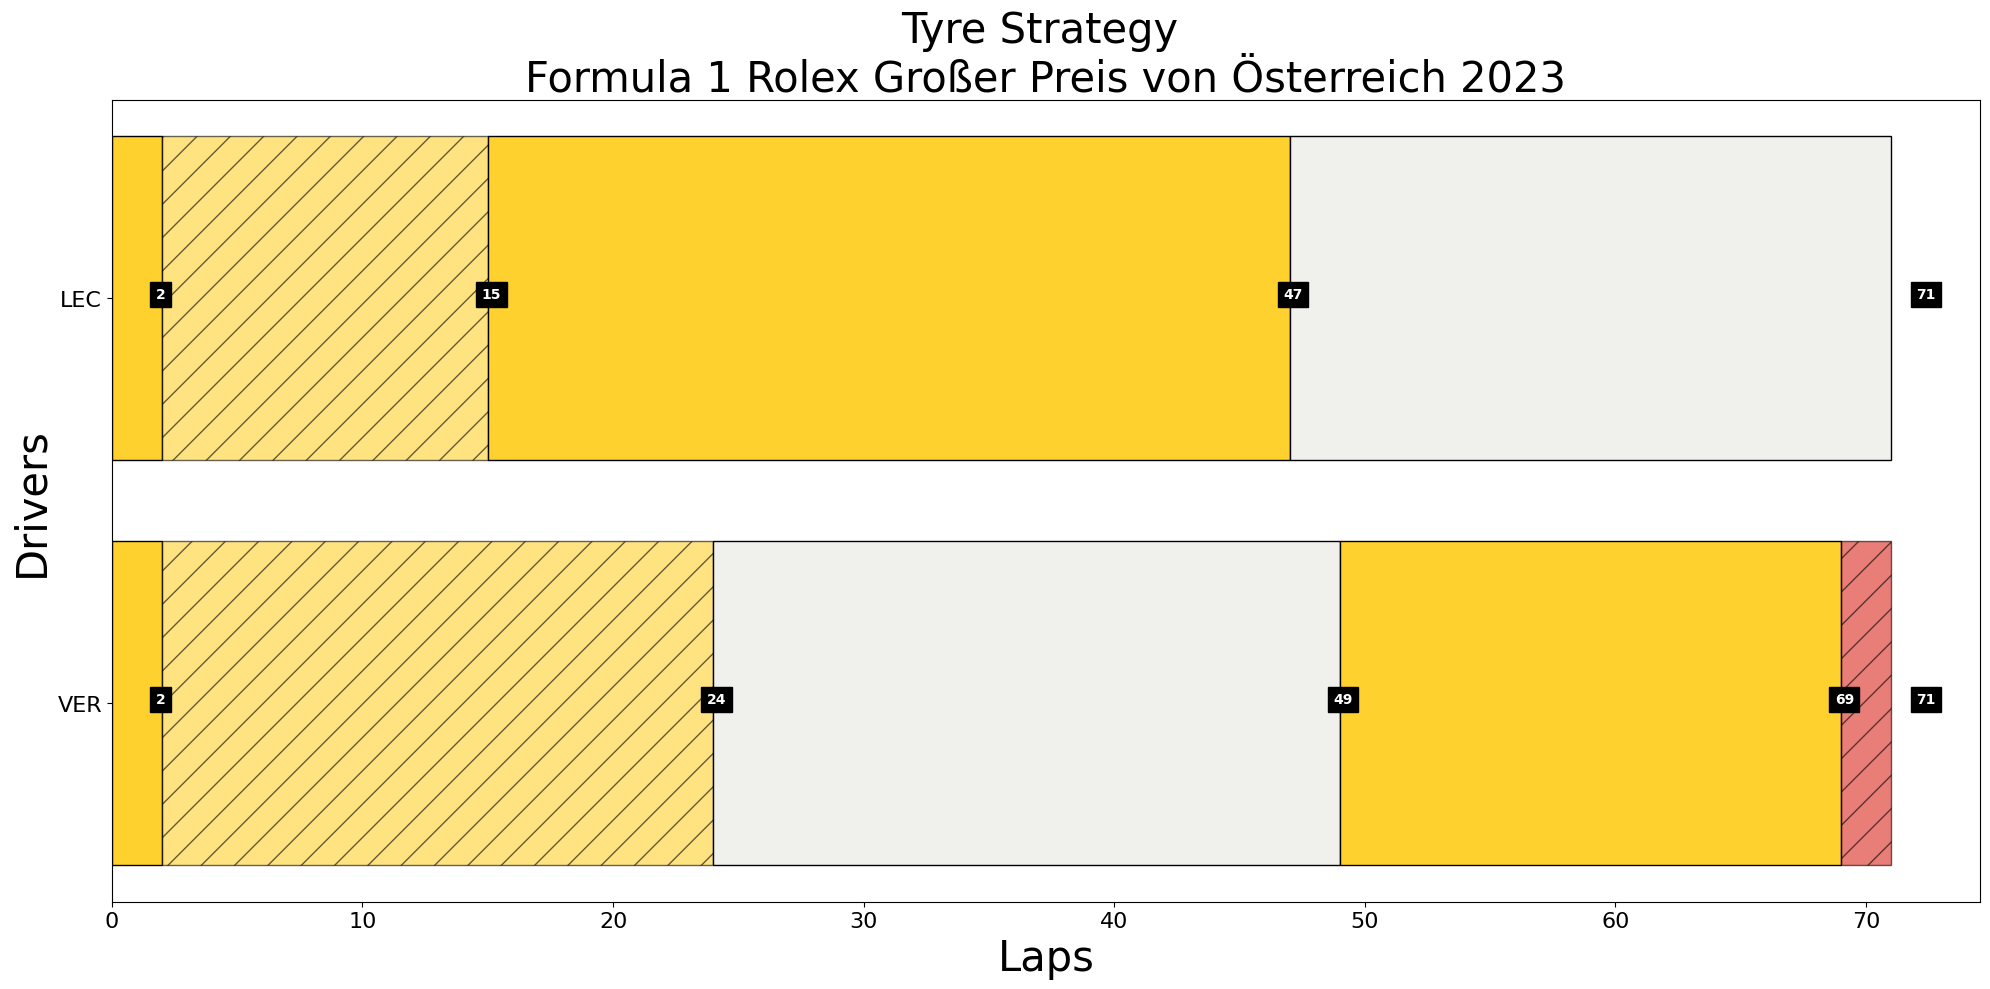

In [17]:
plot_tyre_strategy(fastf1, 'Formula 1 Rolex Großer Preis von Österreich 2023')

# Evidence why Verstappen decided to pit in lap 69:

![title](img/pit_stop.png)